# **EDA-6. Проектирование экспериментов**

# 1. Введение в модуль

→ Помимо получения хороших результатов от обучения модели машинного обучения, ещё одной важной задачей специалиста по данным является организация экспериментов, позволяющая делать качественные выводы.

В качестве ответа на такую потребность используется отслеживание экспериментов. Комьюнити машинного обучения реализует отслеживание экспериментов по-разному, будь то электронные таблицы, GitHub или самодельные платформы. Тем не менее, наиболее эффективный вариант — делать это с помощью инструментов, специально разработанных для отслеживания и управления экспериментами по машинному обучению.

**В ЭТОМ МОДУЛЕ МЫ УЗНАЕМ:**

* какую роль занимают эксперименты в проектах по машинному обучению;

* что означает отслеживание экспериментов;

* как пользоваться популярным инструментом для мониторинга проектов в ML.

**В ЭТОМ МОДУЛЕ МЫ НАУЧИМСЯ:**

* проектировать эксперименты и строить по ним выводы;

* запускать платформу для трекинга и производить логирование экспериментов из Colab.

# 2. Введение в проектирование экспериментов

→ Вы уже познакомились с такими разделами разведывательного анализа данных, как визуализация данных, постановка и проверка гипотез о данных, A/B-тестирование. А ведь всё это можно отнести ещё только к началу работы над проектом по машинному обучению! 

**Машинное обучение (ML)** — это область компьютерных наук, которая использует алгоритмы для создания и обучения моделей для выполнения рутинных задач. 

Типичный подход к управлению проектами машинного обучения основан на проектировании моделей машинного обучения вручную. И обычно он представлен следующими этапами:

![](https://lms.skillfactory.ru/assets/courseware/v1/55016f8e2b093a5e8f2faa175f0638ed/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-6-1.png)

Например, вы хотите сделать анализ спроса людей на определённое лекарство. Вы собираете данные о клиентах и информацию о том, купил ли конкретный клиент лекарство. Затем вы анализируете доступные данные, создаёте и обучаете модель машинного обучения, потом используете готовую модель на новых данных такого же формата, что и предыдущие.


Этот процесс предполагает, что обученная модель должна быть конечным результатом проекта машинного обучения. Однако такой подход ошибочен по нескольким причинам.

Мир постоянно развивается, стимулируемый прорывными технологиями, что приводит к постоянному увеличению объёма данных. Следовательно, данные, которые инженеры машинного обучения должны обрабатывать для обучения моделей, также постоянно меняются. Обученная модель может удовлетворить непосредственные потребности заказчика только на основе данных, которые ей были предоставлены, но в долгосрочной перспективе она может оказаться неэффективной, поскольку она не приспосабливается автоматически к изменениям в наборах данных. 

> Например, если вы хотите использовать готовую модель анализа спроса на лекарства, которая была обучена на данных покупателей (регион проживания, цвет глаз, возраст), но о новых покупателях нет возможности собрать подобные данные (в анкетах больше не указывались цвет глаз и регион проживания),

Обновления в фиксированных наборах данных, используемых для обучения, приводят к изменениям в модели, что снижает её точность. В примере выше столбцы регион и цвет глаз будут иметь пропуски для новых клиентов, а следовательно, прогноз модели, который является суммой признаков, умноженных на обученные коэффициенты, не будет достоверным.

> Это особенно важно для проектов в сфере здравоохранения. Чем выше точность показывает модель при классификации медицинских изображений, тем выше шансы, что она сможет соперничать с профессиональными медиками в постановке точных диагнозов, исключая риск человеческой ошибки.

> **Точность модели** (accuracy) машинного обучения определяется как процент правильных прогнозов для тестовых данных и рассчитывается путём деления количества правильных прогнозов на общее количество прогнозов. Обычно это определяющий фактор при оценке успеха проекта машинного обучения — чем выше точность, тем лучше работает модель машинного обучения. 

Например, вы оцениваете спрос на товар. Ваша цель — узнать, купит ли клиент продукт. Вы строите модель на основе данных и реальных ответов, а затем сравниваете свои предсказания и реальные ответы. Если предсказания совпадают с реальными ответами чаще, чем в 90 % случаях, то обычно говорят, что модель надёжна, и её можно использовать для предсказаний спроса уже других клиентов. 

![](https://lms.skillfactory.ru/assets/courseware/v1/51d97d83c89292c847920693528eaaa6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-6-2.png)

КАК ДОБИТЬСЯ ЛУЧШЕЙ ТОЧНОСТИ МОДЕЛИ ML?

Чтобы оптимизировать метрики для тестовых данных, необходимо пространство для многочисленных экспериментов. Экспериментирование с различными архитектурами моделей, кодом предварительной обработки и параметрами модели, определяющими успех процесса обучения, несколько раз приводит к повторному обучению модели. Всё это вы будете изучать в будущих модулях, посвящённых моделированию в ML.  

Возникает необходимость отслеживания экспериментов, то есть сохранения всей важной информации, связанной с каждым запускаемым экспериментом, например сохранение параметров запуска, влияющих на производительность модели. Выполнять эту задачу вручную обременительно, поэтому имеет смысл поставить для процесса автоматизированную инфраструктуру — **пайплайн** (pipeline) машинного обучения.

**Пайплайном** (pipeline) в ML называется способ систематизации и автоматизации рабочего процесса, необходимого для создания модели машинного обучения. Пайплайны состоят из нескольких последовательных шагов, которые выполняют всё — от извлечения и предварительной обработки данных до обучения и проверки моделей.

Пайплайн машинного обучения состоит из следующих шагов:

![](https://lms.skillfactory.ru/assets/courseware/v1/39ebef88c19308deecbce2266474b48e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-6-3.png)

Этот рабочий процесс позволяет осуществлять непрерывную настройку существующих моделей наряду с постоянной оценкой производительности. Самым большим преимуществом этого процесса является то, что его можно автоматизировать с помощью доступных инструментов.

Для медицинских стартапов это означает, что они могут получить модель машинного обучения для конкретного проекта, которая будет постоянно обновляться по мере поступления новых данных о пациентах, что приведёт к более высокой точности полученных результатов.

✍️ Давайте на примере подробно разберём проектирование экспериментов и построение пайплайна. 

> Представьте, что вы специалист по данным, а ваша компания сотрудничает с медицинскими учреждениями. Перед вами стоит задача выяснить, почему люди, получившие инструкции по лечению, не приходят на следующий приём. В качестве набора данных вы используете информацию о посещениях и характеристики пациентов. 

Каждая история болезни характеризуется следующими признаками:

* No_show — пациент не пришёл на приём;
* Gender — пол пациента;
* ScheduledDay — день, когда планируется встреча;
* AppointmentDay — реальная дата встречи;
* Age — возраст пациента;
* Neighbourhood — район проживания каждого пациента;
* Scholarship — получает ли пациент стипендию;
* …и несколько других признаков.

### 1. Первым этапом данных является загрузка данных: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

**Что делать, если не получается загрузить данные с Kaggle?**

Воспользуйтесь [альтернативной ссылкой](https://lms.skillfactory.ru/assets/courseware/v1/757324828c4c8e82141ee30b3a5e2022/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/KaggleV2-May-2016.csv.zip) на данные.

In [3]:
df = pd.read_csv('data\KaggleV2-May-2016.csv')

Основная цель проекта — выделить факторы, способствующие пропуску встреч с врачом. Однако это долгосрочная цель. Прежде чем копнуть глубже, необходимо попытаться ответить на следующие вопросы:

* Каково соотношение людей, которые пропускают встречи, к тем, кто этого не делает?
* Кто не появляется чаще — мужчины или женщины?

### 2. Для ответа на эти и другие подобные вопросы используется EDA.

Найти соотношение людей, которые пропускают приёмы, к тем, кто этого не делает, можно с помощью гистограммы:

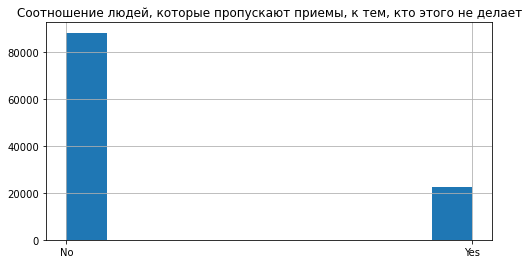

In [4]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

Или, если мы хотим получить точную пропорцию, — с помощью метода value_counts():

In [5]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

Данный метод также может помочь оценить, кто не появляется чаще — мужчины или женщины:

In [6]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)


F    0.653882
M    0.346118
Name: Gender, dtype: float64

Итак, мы видим, что людей, пропускающих приём, примерно 20 %, и из них 65 % — женщины.

### 3. Предобработка данных
После того, как выполнен разведывательный анализ данных, переходим к предобработке данных. Некоторые столбцы, например ```‘Gender’``` и ```‘Neighbourhood’```, представлены в текстовом виде, а модели машинного обучения работают с числовыми признаками. Необходимо закодировать такие данные. Для one-hot кодировки можно воспользоваться методом ```get_dummies()``` библиотеки pandas:

In [7]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

### 4. Создание предсказания

После этих этапов можно переходить к созданию предсказания, придёт ли пациент на приём, обучению и оптимизации модели, а также выделению наиболее важных признаков, способствующих высокой производительности модели. Об этом вы узнаете в будущих модулях!  

Предположим, вы несколько раз обучили модель с разными параметрами, подобрали наилучшие и достигли $accuracy>0.9$. То есть доля верных предсказаний превышает 90 %. Также вы узнали, что наибольший вклад в модель вносят такие признаки, как пол, регион и факт наличия стипендии. Про влияние пола на результат вы догадались во время проведения EDA, регион кажется тоже понятным фактором: люди в крупных городах больше склонны приходить на последующий назначенный прием, а вот факт наличия стипендии — не такой очевидный фактор. 

Это подтверждает тезис о том, что модели машинного обучения могут рассматриваться как чёрный ящик: нечто, куда мы кладём свои данные и получаем предсказание. Не всегда результаты прогнозов легко интерпретируемы. Обычно существует **трэйд-офф** между качеством модели и её интерпретируемостью: чем сложнее модель, тем выше, но менее очевиден её результат.    



⬇️ Ноутбук с продемонстрированным кодом доступен по [ссылке](https://lms.skillfactory.ru/assets/courseware/v1/a60205a7aef74bb8877c204d4c570551/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/noshowappointments.ipynb).

Как мы уже выяснили, в реальных проектах может понадобиться не один эксперимент для улучшения производительности модели. Появляется необходимость сохранения всей важной информации, связанной с каждым запускаемым экспериментом. Как сохранять такую информацию, вы узнаете в следующем юните.

# 3. Логирование экспериментов

→ Итак, запуск экспериментов по машинному обучению включает в себя множество задач, таких как EDA и предобработка данных. В последнюю может входить заполнение пропусков данных, проверка различных алгоритмов с целью поиска наилучшего, анализ производительности модели и другие связанные задачи, которые зависят от решаемой проблемы.

Как вы уже знаете, в процессе проведения эксперимента по машинному обучению можно использовать функцию print() для просмотра выходных данных экспериментов, таких как уровень корреляции данных в выборке, результат тестирования статистической гипотезы и так далее. 

Однако время от времени выводить результат на экран с помощью функции print() бесполезно, так как при запуске следующего эксперимента вы потеряете все результаты предыдущего эксперимента, если не запишете их вручную в документ. 

Таким образом, сравнение результатов ML-экспериментов становится весьма затруднительным процессом, потому что необходимо иметь записи всех проводимых ранее экспериментов. Например, если во время EDA-задачи предсказания спроса на лекарство изменяются данные, то каждый раз выводить на экран новую визуализацию неудобно. 

Логирование решает эту проблему! Даже если информация изменится с запуском нового эксперимента, всё будет зафиксировано в логе. 

> **Лог** (log) — это специальный журнал, в котором хранится информация о состоянии работы программы. Логирование (ведение журнала) обеспечивает отслеживание событий, происходящих во время работы программы, и может выводить эти события в отдельный файл, чтобы вы могли отслеживать, что происходит во время выполнения кода. 

Пример такого файла: 

![](https://lms.skillfactory.ru/assets/courseware/v1/950fc343eb32dab13e94f0f30764ca54/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-6-14.png)

Здесь зафиксирована информация о форме данных и соотношение классов целевой переменной Gender. Это даёт возможность отлаживать код. Далее мы подробнее разберём, как создавать логи. 

Для логирования в Python используется модуль logging. Он используется большинством сторонних библиотек Python, поэтому вы можете интегрировать свои логи с сообщениями из этих библиотек для создания единого журнала логов приложения. Данный модуль импортируется как другие библиотеки:

In [8]:
import pandas as pd 
import logging
import os

In [9]:
df = pd.read_csv('./data/KaggleV2-May-2016.csv')

Прежде чем приступить к логированию, необходимо установить базовые настройки:

* уровень;
* обработчик (хендлер);
* формат логирования.

✍️ Давайте разберёмся с этими конфигурациями по порядку.



## НАСТРОЙКА УРОВНЯ ЛОГИРОВАНИЯ

![](https://lms.skillfactory.ru/assets/courseware/v1/465691fef92f3a3ae2b612c14e2dbde2/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-6-10.png)

С импортированным модулем logging вы можете использовать так называемый «logger» для логирования сообщений, которые вы хотите видеть (вместо вывода их на экран командой print()). 

По умолчанию существует пять стандартных уровней логирования, указывающих на важность событий: 

* отладка;
* информация;
* предупреждение;
* ошибка;
* критический. 

Самый низкий уровень из данных — не установлен, а самый высокий уровень является критическим. Установив уровень логирования, можно записать сообщение специально для этого уровня в определённый файл журнала. Возле сообщения будет указан его уровень.

In [10]:
df = pd.read_csv('./data/KaggleV2-May-2016.csv')

In [11]:
import logging
logging.debug('Это сообщение отладки')
logging.info('Это информационное сообщение')
logging.warning('Это сообщение-предупреждение')
logging.error('Это сообщение об ошибке')
logging.critical('Это критическое сообщение')

ERROR:root:Это сообщение об ошибке
CRITICAL:root:Это критическое сообщение


Здесь мы дали команду залогировать пять сообщений. Вывод команд показывает уровень важности перед каждым сообщением (WARNING/ERROR/CRITICAL). root — имя логера по умолчанию.

Этот формат, который показывает уровень, имя и сообщение, разделенные двоеточием (:), является форматом вывода по умолчанию. Его можно изменить для включения таких вещей, как отметка времени, номер строки и других деталей. Мы научимся делать это чуть ниже.

Обратите внимание, что сообщения debug() и info() не были отображены. Это связано с тем, что по умолчанию модуль ведения журнала регистрирует сообщения только с уровнем ПРЕДУПРЕЖДЕНИЕ (WARNING) или выше. Вы можете изменить это, сконфигурировав модуль logging для регистрации событий всех уровней, то есть установив уровень на ОТЛАДКУ (DEBUG). 

![](https://lms.skillfactory.ru/assets/courseware/v1/104c7f4800236ffbd2c6408a909cdfe2/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-6-12.png)

В приведённом ниже примере кода показано, как можно настроить уровень ведения журнала на DEBUG.

In [12]:
logging.basicConfig(level=logging.DEBUG)
logging.debug('Сообщение будет залогировано!')

Мы настроили уровень ведения журнала DEBUG, что означает, что будут отслеживаться только сообщения этого уровня (DEBUG) и выше.

Помимо файла лог может быть записан и в другой формат. Для этого используются **обработчики (хендлеры) логов**.

## УСТАНОВКА ОБРАБОТЧИКА ЛОГИРОВАНИЯ

> Функция **обработчиков ведения журналов** состоит в том, чтобы отображать записи/сообщения журнала на любом выходе, который вы выберете. То есть вы можете выбрать, отображать ли ваш лог в виде файла, HTTP-страницы или даже отправить лог на электронную почту через SMTP. 

Более того, у созданного вами logger может быть несколько обработчиков, а это значит, что вы можете настроить его на сохранение в файл журнала, а также на отправку по email одновременно. Подробнее ознакомиться с видами хендлеров можно здесь.

Обработчики являются классами модуля logging. Нам понадобится обработчик FileHandler, который возьмёт запись/сообщение журнала и добавит его в файл журнала log_file.log:

In [13]:
logging.FileHandler('log_file.log')


<FileHandler e:\Study\Data science SF\IDE\SkillFactory\EDA-6. Проектирование экспериментов\log_file.log (NOTSET)>

## УСТАНОВКА ФОРМАТА ЛОГИРОВАНИЯ

Как мы уже сказали, типичный формат лога выглядит так: уровень: имя: сообщение. Однако его можно изменить.

Существуют различные способы форматирования записи журнала. Вы можете включить дату, время и уровень ведения журнала в свой формат, чтобы знать, когда журнал был отправлен и на каком уровне. В приведённом ниже примере показано, как можно настроить формат записей журнала.

In [14]:
logging.basicConfig(format="%(levelname)s: %(asctime)s: %(message)s", 
                    level=logging.DEBUG,
                    filename='log_file.log')
logging.info('Проверка')

![](https://lms.skillfactory.ru/assets/courseware/v1/f6e11f128ad7abe52fea82273400b35f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-6-13.png)

Здесь формат записей журнала включает дату, время, уровень ведения журнала и само сообщение.

Таким образом, вы можете изменять как формат лога, так и формат вывода. Добавление времени сообщения существенно облегчает работу — становится легко отследить, когда было получено сообщение.

✍️ Теперь, когда вы понимаете основы модуля logging в Python, посмотрим, как можно его использовать при проведении экспериментов по машинному обучению. Давайте залогируем информацию о нашем датасете [Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments). 

Создадим функцию log() для генерации лог-файла и записи в него информации.

In [15]:
# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
   """[Создает лог-файл для логирования в него]
   Аргументы:
       path {string} -- путь к директории
       file {string} -- имя файла
  
   Возвращает:
       [obj] -- [логер]
   """
 
   # проверяем, существует ли файл
   log_file = os.path.join(path, file)
 
   if not os.path.isfile(log_file):
       open(log_file, "w+").close()
 
   # поменяем формат логирования
   file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
 
   # конфигурируем лог-файл
   logging.basicConfig(level=logging.INFO, 
   format = file_logging_format)
   logger = logging.getLogger()
  
   # создадим хэнлдер для записи лога в файл
   handler = logging.FileHandler(log_file)
 
   # установим уровень логирования
   handler.setLevel(logging.INFO)
  
   # создадим формат логирования, используя file_logging_format
   formatter = logging.Formatter(file_logging_format)
   handler.setFormatter(formatter)
 
   # добавим хэндлер лог-файлу
   logger.addHandler(handler)
 
   return logger

Итак, get_logger принимает на вход папку, в которой вы хотите хранить файл лога и имя файла. Функция нацелена на создание информационных сообщений и записи их в лог-файл. Для того, чтобы освежить в памяти знания по работе с файлами, вы можете вернуться к Блоку 2 нашего курса («Подгрузка данных»).  

Для удобства лог-файлы хранят в отдельной директории. Новую папку можно создать с помощью команды mkdir:

In [16]:
!mkdir logs

�������� ��� 䠩� logs 㦥 �������.


Создадим лог-файл и запишем туда информацию о датасете.



In [17]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

In [18]:
logger.info("Data")

In [19]:
logger.info("Data shape {}".format(df.shape))

In [20]:
logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

In [21]:
logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

В директории logs появится файл data.logs, который будет выглядеть следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/950fc343eb32dab13e94f0f30764ca54/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-6-14.png)

⭐️ Отлично! Мы зафиксировали информацию о датасете в лог-файл. Такой файл отражает сведения о том, что всё работает в штатном режиме (то есть просто ежедневный мониторинг программы) или что произошла какая-то ошибка, на которую нужно максимально срочно отреагировать и устранить. Например, мы можем проверять форму данных, и, если форма не соответствует необходимой, логировать ошибку:

In [22]:
if df.shape != (110526,14):
    logger.error('Data shape is incorrect!')

ERROR:root:Data shape is incorrect!


Посмотрим на обновленный файл data.logs:

![](https://lms.skillfactory.ru/assets/courseware/v1/b71e2ff5896d1d29b1d002dd7ef23115/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-6-9.png)

⬇️ Ноутбук доступен по ссылке.

⭐️ В следующем юните вы познакомитесь с платформой, которая позволяет не только логировать информацию об эксперименте, но и с лёгкостью сравнивать эксперименты между собой, а также работать над ними в команде!

# 4. Знакомство с Comet.ml

→ Comet.ml — это онлайн-платформа, позволяющая отслеживать эксперименты. Основное преимущество Comet состоит в том, что с её помощью можно легко построить панель отчётности и систему мониторинга.

	
Comet предоставляет следующие возможности:

* сравнивать эксперименты с точки зрения метрик, параметров и так далее;
* следить за моделью от создания до вывода в продакшен;
* делиться своим проектом с другими людьми, которые в режиме реального * времени будут следить за результатами;
* строить отчёты исходя из результатов эксперимента;
* оставить проект приватным или сделать его общедоступным.

Для начала работы с платформой [Comet.ml](https://www.comet.ml/site/) необходимо зарегистрировать бесплатную учётную запись. После этого вы сможете создавать как публичные, так и приватные проекты. 



### 1. Install Comet Using pip

```python
pip install comet_ml  

pip3 install comet_ml
```

### 2. Add Tracking Code for Keras
More details available at Keras Quickstart Guide and Examples

```python
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="5vZWA3irmzydGpLocyL2ZTJEq",
    project_name="general",
    workspace="terr-14",
)

# Run your code and go to /
```

### 3. Run your experiment
Run your training code just like you normally do (ie. python train.py).

### 4. See data on Comet
In a few moments your data will be transmitted to the experiments page. Your experiment will send data to Comet.


![](https://lms.skillfactory.ru/assets/courseware/v1/447c57fadc3e9c848b233c9e2aa11c45/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-6-16.png)

После создания проекта появится пустая доска, на которую можно добавить эксперименты, нажав на кнопку **+Add**. 

![](https://lms.skillfactory.ru/assets/courseware/v1/0d23dd53c20f59c030b67e1e64ddc518/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-6-17.png)

Платформа генерирует новый API для эксперимента, который можно использовать в коде Python:

In [3]:
#pip install comet_ml

In [5]:
# import comet_ml at the top of your file
from comet_ml import Experiment

In [6]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="5vZWA3irmzydGpLocyL2ZTJEq",
    project_name="medical-appointment",
    workspace="terr-14",
)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Run will not be logged 
For more details, please refer to: https://www.comet.ml/docs/python-sdk/warnings-errors/
Traceback (most recent call last):
  File "c:\Users\Home\anaconda3\lib\site-packages\comet_ml\experiment.py", line 890, in _start
    self.alive = self._setup_streamer()
  File "c:\Users\Home\anaconda3\lib\site-packages\comet_ml\_online.py", line 308, in _setup_streamer
    self._initialize_streamer(full_ws_url, initial_offset)
  File "c:\Users\Home\anaconda3\lib\site-packages\comet_ml\_online.py", line 365, in _initialize_streamer
    self.ws_connection = WebSocketConnection(
  File "c:\Users\Home\anaconda3\lib\site-packages\comet_ml\connection.py", line 1042, in __init__
    self.ws = self.connect_ws()
  File "c:\Users\Home\anaconda3\lib\site-packages\comet_ml\connection.py", line 1059, in 

Например:

![](https://lms.skillfactory.ru/assets/courseware/v1/1c54dcc11104d4a9bdfebb2d65cf5877/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-6-18.png)

> Класс **Experiment** — это интерфейс локального кода для Comet. Он определяет множество методов, описанных в официальной документации Comet. Платформа позволяет хранить информацию о коде, логировать графики, гиперпараметры модели (о них вы узнаете дальше в курсе), метрики. 

Давайте рассмотрим некоторые популярные методы:

* log_metric() и log_metrics() — логируют в эксперименте одну или несколько * оценочных метрик, таких как accuracy;
* log_figure() — логирует рисунок;
* display() — создаёт интерактивную среду в Jupyter, показывающую приборную * панель Comet как вывод ячейки;
* end() — если эксперимент выполняется в Jupyter, этот метод указывает, что эксперимент завершён.

После завершения эксперимента Comet предоставляет информационную панель, где можно увидеть все залогированные в коде метрики, цифры, параметры и так далее.

Показатели оценки отображаются автоматически. Например, если эксперимент состоит из нескольких шагов, можно легко нарисовать графики, показывающие метрики в зависимости от количества шагов.

Ниже представлен пример графика, иллюстрирующего изменение accuracy на каждом шаге обучения нейронной сети (про нейронные сети вы узнаете далее по курсу). 

![](https://lms.skillfactory.ru/assets/courseware/v1/2f45c36c0cac87337eab8f6b4e639106/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-6-20.png)

Итак, Comet.ml — это платформа для экспериментов с машинным обучением, которую специалисты по данным используют для отслеживания, сравнения и объяснения своих экспериментов по машинному обучению. Она обеспечивает воспроизведение моделей, простое обслуживание рабочего процесса машинного обучения и бесперебойную совместную работу на протяжении всего жизненного цикла проекта.  

Например, вы в команде строите модель оценки спроса на лекарство. Вы можете разделить пайплайн машинного обучения между участниками проекта, при этом каждый участник получит возможность отслеживать все эксперименты каждого этапа в Comet: от логирования визуализаций до подбора параметров обучения модели и оценки её производительности.